In [ ]:
towers = [[1,2,5],[2,1,7],[3,1,9]]
radius = 2


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


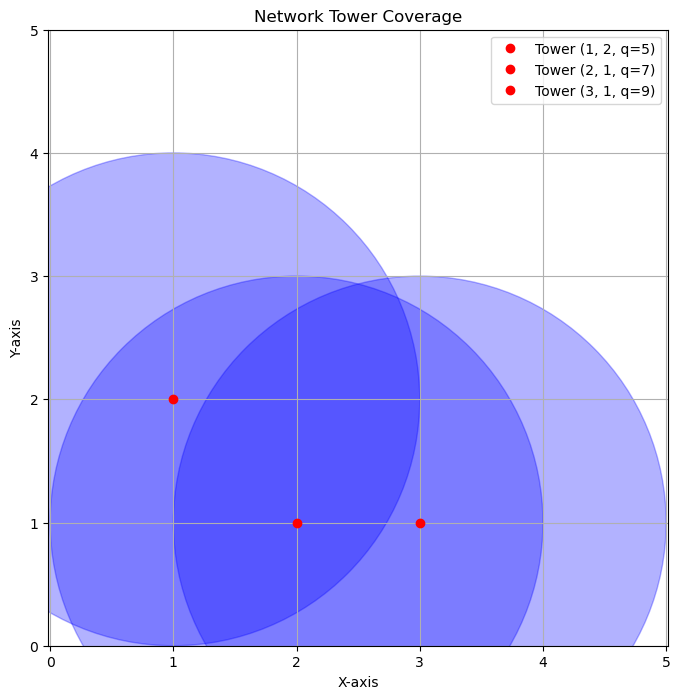

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# 그래프 설정
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, 5)  # X축 범위 (적절히 수정 가능)
ax.set_ylim(0, 5)  # Y축 범위 (적절히 수정 가능)
ax.set_aspect('equal', adjustable='datalim')

# 각 타워에 대해 중심과 범위를 표시
for tower in towers:
    x, y, q = tower
    # 타워 위치에 점 표시
    ax.plot(x, y, 'ro', label=f'Tower ({x}, {y}, q={q})')  
    # 범위를 나타내는 원 추가
    circle = Circle((x, y), radius, color='blue', alpha=0.3)
    ax.add_patch(circle)

# 그래프 꾸미기
plt.title("Network Tower Coverage")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend()
plt.show()



In [31]:
# 어...일단은 감이 안잡히는데. 전체를 계산하는 방법부터 먼저 만들어 봅시다.
# 원래 무식한 방법부터 해결하는 거랬어

import math

def euclidean_distance(position, tower):
    tower_x, tower_y,_ = tower
    x, y = position
    dist = ((x-tower_x)**2 + (y-tower_y)**2)**0.5
    return dist

# 검사할 포지션
def area_to_check(towers, radius):
    positions = []
    for tower in towers:
        tower_x, tower_y, _ = tower
        min_x, max_x = tower_x - radius, tower_x+radius
        min_y, max_y = tower_y - radius, tower_y+radius
        range_x = [i for i in range(min_x, max_x)]
        range_y = [i for i in range(min_y, max_y)]
        
        for x in range_x:
            for y in range_y:
                dist = euclidean_distance([x, y], tower)
                if dist <= radius:
                    # 유클리드 거리랑 타워 정보를 같이 넣으면 쓸모가 있나 이게. 어차피 모든 타워에 대해서 재검사를 실시해야하는데.
                    # 의미가 있나?
                    positions.append([x, y])
    
    # set은 이차원 리스트 정리가 불가능. 근데 튜플은 가능. 희안한 놈이군..
    unique_positions = list(set(tuple(position) for position in positions))             
    unique_positions = [list(position) for position in unique_positions]            # 굳이 리스트로 다시 만들어야하는 필요성이 있나 이게. 일단 넘어가고
    unique_positions.sort()         # 내가 보기 좋게
    # print(unique_positions)
    return unique_positions
        
# 이 포인트들의 신호 강도를 이제 계산해야하는군?
def signal_strength(position, towers, radius):
    x, y = position
    
    sum_strength = 0
    for tower in towers:
        tower_x, tower_y, quality = tower
        dist = euclidean_distance(position, tower)
        if dist <= radius:
            strength = quality/(1+dist)
            sum_strength += math.floor(strength)
            
    return [position, sum_strength]

# 모든 포인트의 신호 강도를 계산한 결과를 만들어야지
def cal_signal_strength(positions, towers, radius):
    result = []
    for position in positions:
        result.append(signal_strength(position, towers, radius))
    return result

# 신호가 쎈 친구를 찾아야하고.
def max_strength(positions):
    max_quality = max(enumerate(result), key=lambda x:x[1][1])
    if max_quality[1][1] == 0:
        position = [0,0]
    else:
        position = max_quality[1][0]
    # print(max_quality)
    return position

positions = area_to_check(towers, radius)
result = cal_signal_strength(positions, towers, radius)
max_quality = max_strength(result)
print(result)
print(max_quality)

[[[-1, 2], 1], [[0, 1], 4], [[0, 2], 2], [[0, 3], 2], [[1, 0], 3], [[1, 1], 8], [[1, 2], 7], [[1, 3], 2], [[2, -1], 2], [[2, 0], 6], [[2, 1], 13], [[2, 2], 8], [[2, 3], 4], [[3, -1], 3], [[3, 0], 6], [[3, 1], 12], [[3, 2], 7], [[4, 0], 3], [[4, 1], 6], [[4, 2], 3]]
[2, 1]
